# Final Project: Part 1

### Name: Qianwen Chen

In this part of the project, I will do some exploratory of our selected dataset. 

Name of the dataset: __Pokemon With Stats__

This dataset is availale at __data.world__

The URL of this dataset is: https://data.world/data-society/pokemon-with-stats/file/Pokemon.csv

There is not a license with this data.

The size of this dataset is 43KB, it includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 50})
import seaborn as sns

In [4]:
pokemon_data = pd.read_csv('Pokemon.csv')
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


So we have load the data successful. From this head information, we have a first impression of how this dataset looks like. But we can also see that there is a NaN of __Type 2__ at 4-th row.

We will check how many missing entries in this dataset.

In [35]:
print(np.sum(pd.isna(pokemon_data['Name'])))
print(np.sum(pd.isna(pokemon_data['Type 1'])))
print(np.sum(pd.isna(pokemon_data['Type 2'])))
print(np.sum(pd.isna(pokemon_data['Total'])))
print(np.sum(pd.isna(pokemon_data['HP'])))
print(np.sum(pd.isna(pokemon_data['Attack'])))
print(np.sum(pd.isna(pokemon_data['Defense'])))
print(np.sum(pd.isna(pokemon_data['Sp. Atk'])))
print(np.sum(pd.isna(pokemon_data['Sp. Def'])))
print(np.sum(pd.isna(pokemon_data['Speed'])))
print(np.sum(pd.isna(pokemon_data['Generation'])))
print(np.sum(pd.isna(pokemon_data['Legendary'])))

0
0
386
0
0
0
0
0
0
0
0
0


There are 386 missing __Type 2__ entries. We will try to resolve this issure after we have a integral understanding of this dataset.

Let's look at the distribution of the numerical variables, and the correlations between them.

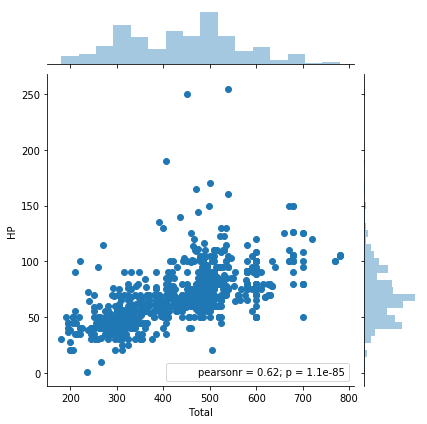

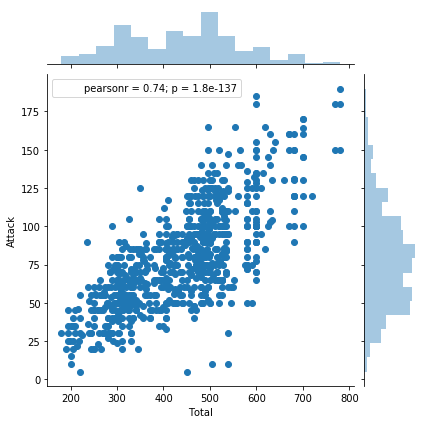

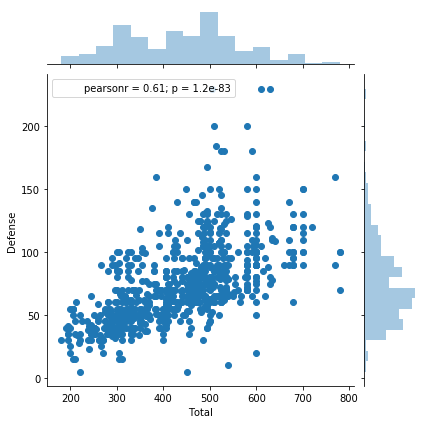

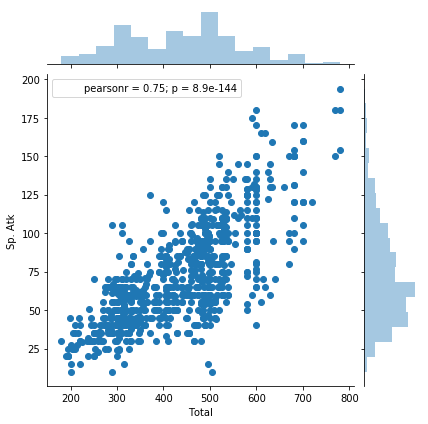

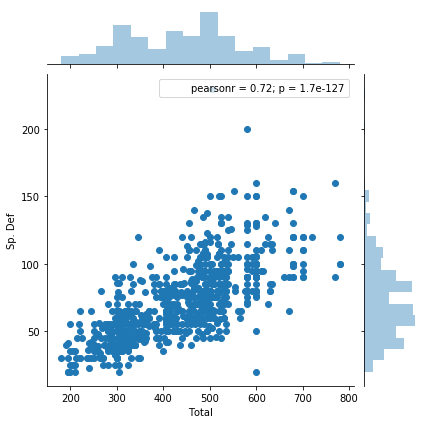

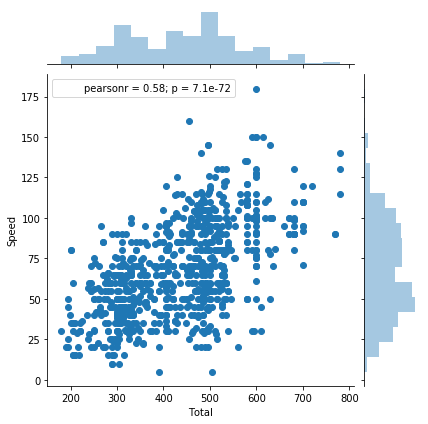

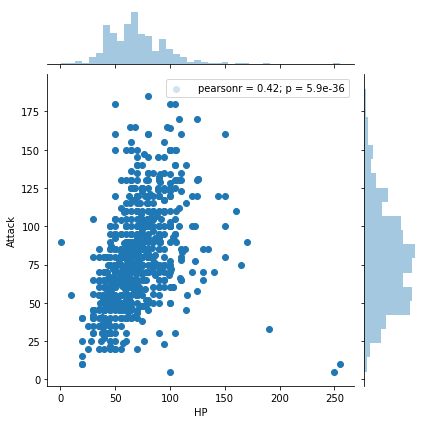

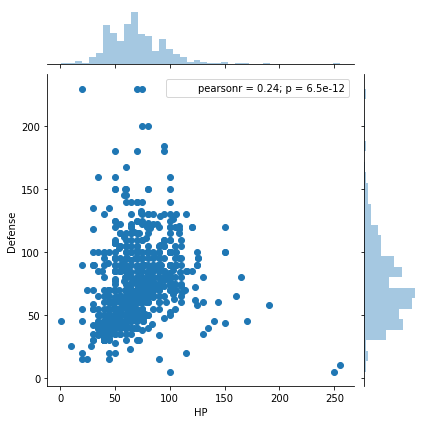

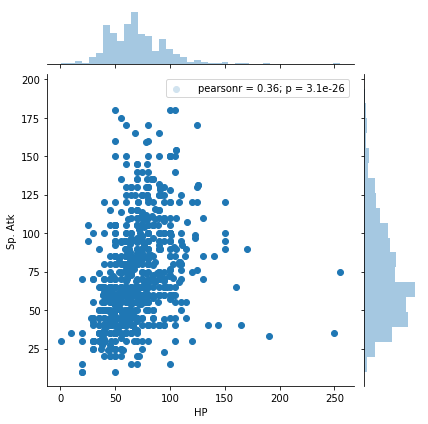

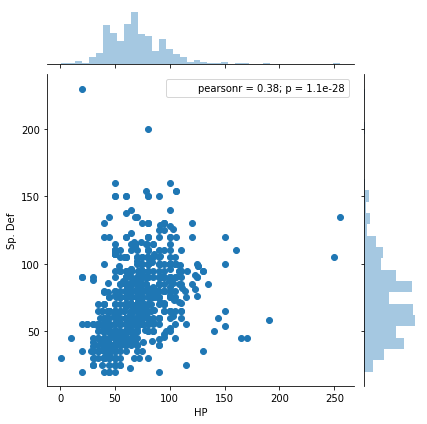

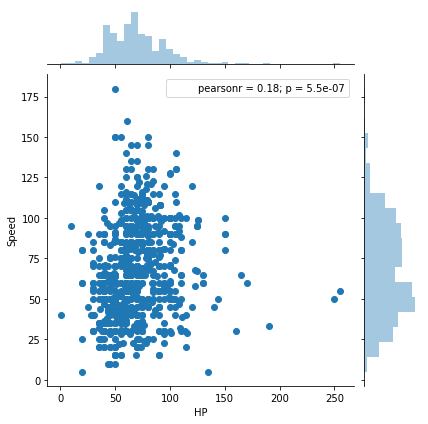

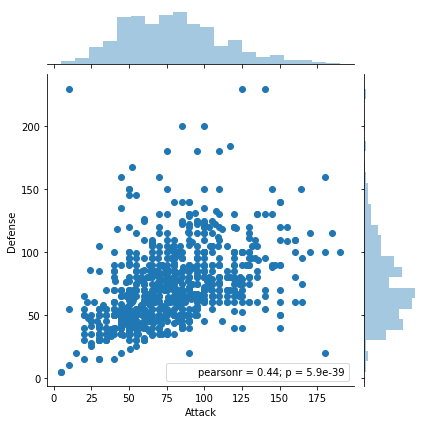

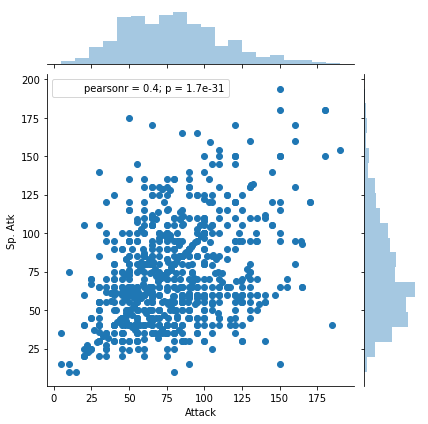

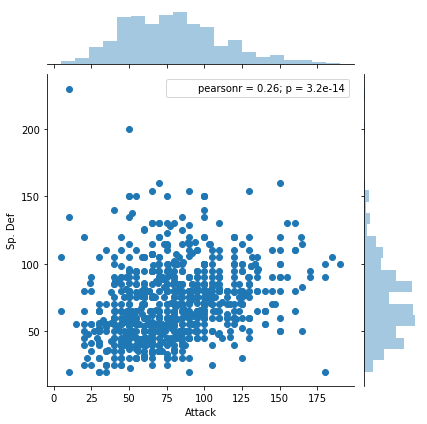

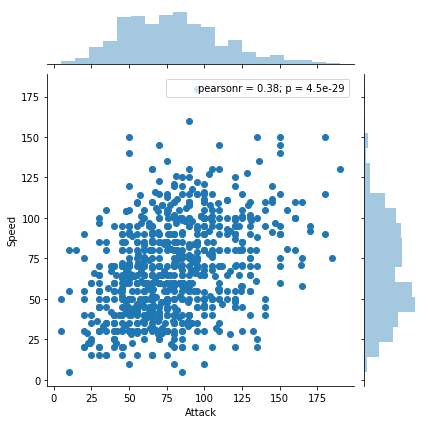

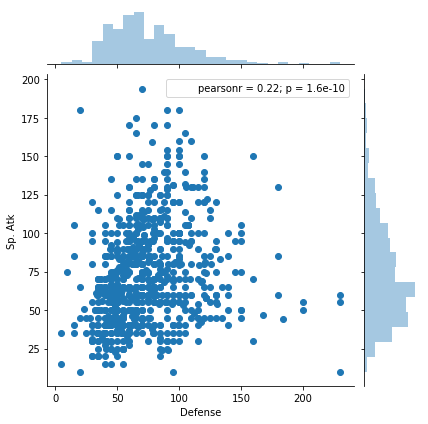

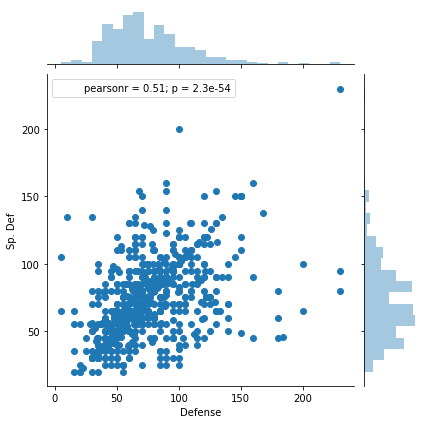

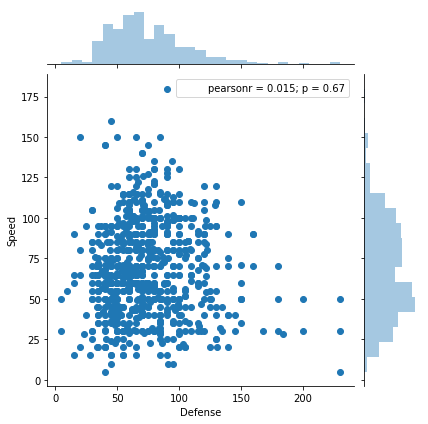

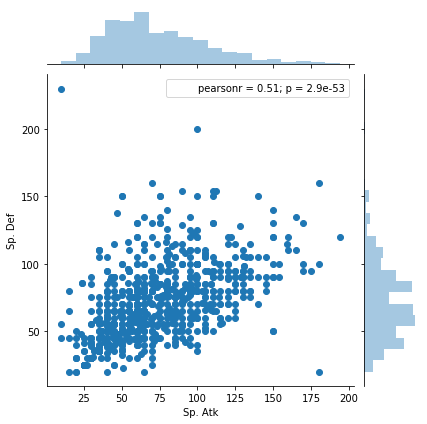

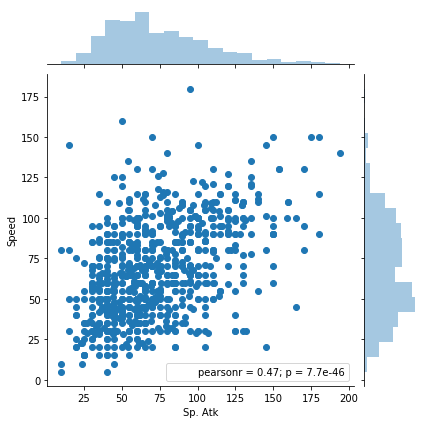

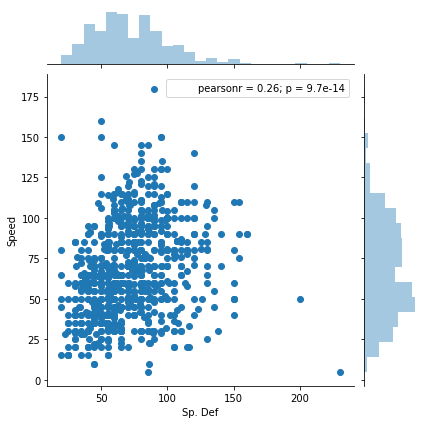

In [55]:
sns.jointplot(x='Total', y='HP', data = pokemon_data)
sns.jointplot(x='Total', y='Attack', data = pokemon_data)
sns.jointplot(x='Total', y='Defense', data = pokemon_data)
sns.jointplot(x='Total', y='Sp. Atk', data = pokemon_data)
sns.jointplot(x='Total', y='Sp. Def', data = pokemon_data)
sns.jointplot(x='Total', y='Speed', data = pokemon_data)
sns.jointplot(x='HP', y='Attack', data = pokemon_data)
sns.jointplot(x='HP', y='Defense', data = pokemon_data)
sns.jointplot(x='HP', y='Sp. Atk', data = pokemon_data)
sns.jointplot(x='HP', y='Sp. Def', data = pokemon_data)
sns.jointplot(x='HP', y='Speed', data = pokemon_data)
sns.jointplot(x='Attack', y='Defense', data = pokemon_data)
sns.jointplot(x='Attack', y='Sp. Atk', data = pokemon_data)
sns.jointplot(x='Attack', y='Sp. Def', data = pokemon_data)
sns.jointplot(x='Attack', y='Speed', data = pokemon_data)
sns.jointplot(x='Defense', y='Sp. Atk', data = pokemon_data)
sns.jointplot(x='Defense', y='Sp. Def', data = pokemon_data)
sns.jointplot(x='Defense', y='Speed', data = pokemon_data)
sns.jointplot(x='Sp. Atk', y='Sp. Def', data = pokemon_data)
sns.jointplot(x='Sp. Atk', y='Speed', data = pokemon_data)
sns.jointplot(x='Sp. Def', y='Speed', data = pokemon_data)
plt.show()

The attribute _Total_ has slightly stronger correlations with all other variables than other pairs. There are too many figures, we will use another visualization to make it more neat, additionally, we also want to see how these variables distributed with __Type 1__.

In [43]:
len(pokemon_data['Type 1'].unique())

18

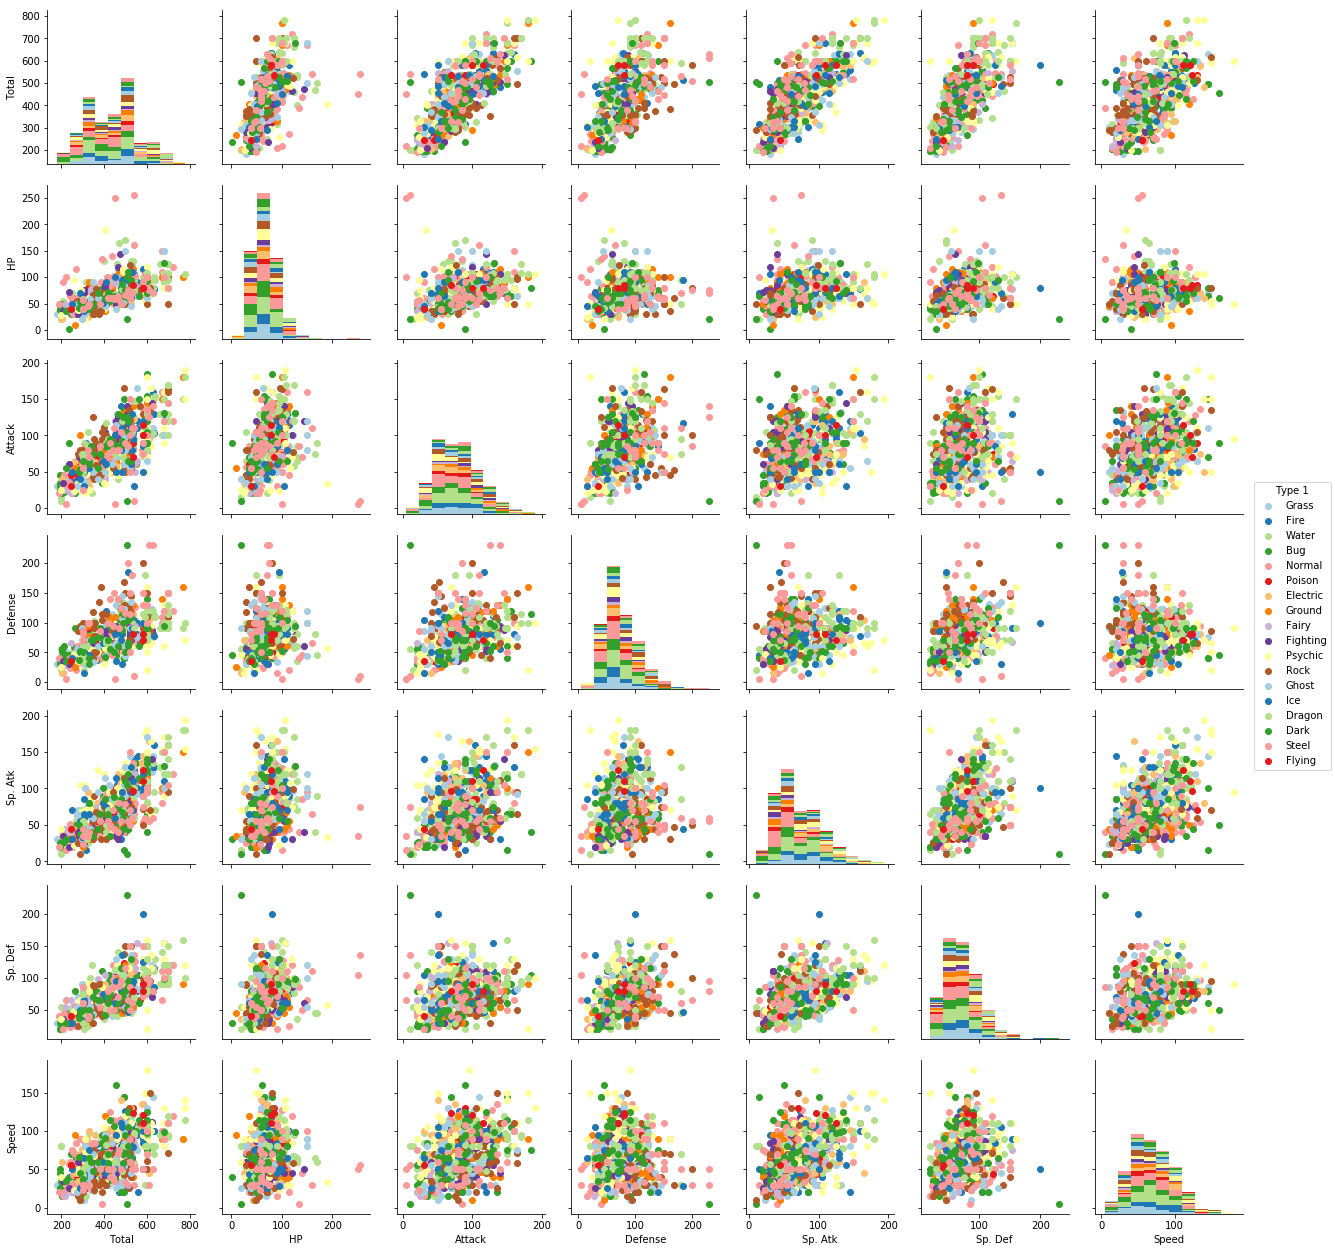

In [47]:
pokemon_data_cols = pokemon_data[['Type 1','Total', 'HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

with sns.color_palette('Paired', 18):
    g=sns.PairGrid(pokemon_data_cols,hue='Type 1')
    g = g.map_offdiag(plt.scatter)
    g = g.map_diag(plt.hist)
    g.add_legend()

We can also see the distributtion of number of pokemons for __Type 1__ with a histogram and a pie chart.

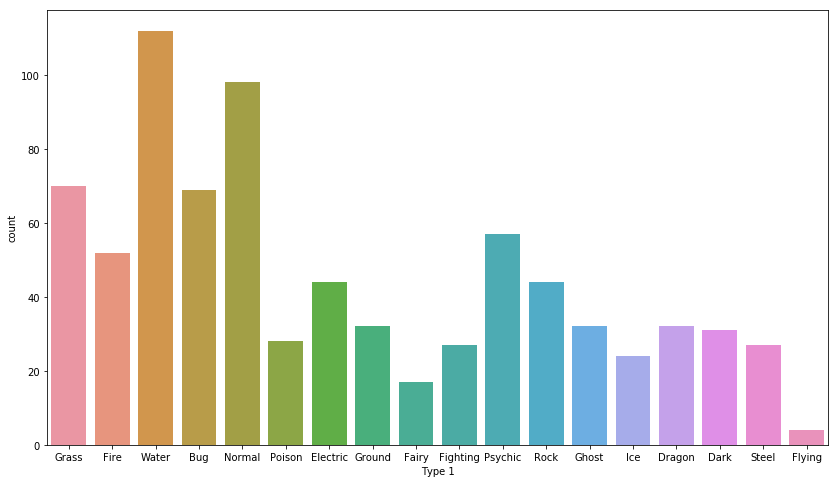

In [63]:
plt.figure(figsize=(14,8))
sns.countplot('Type 1',data=pokemon_data)
plt.show()

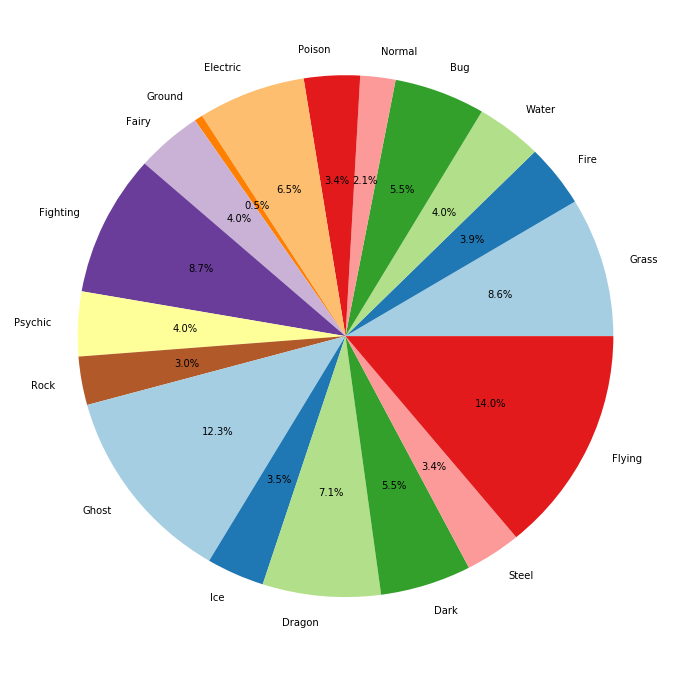

In [68]:
types = pokemon_data['Type 1'].unique()
pokemon_data['index'] = pokemon_data.index
number_for_each_type = pokemon_data.groupby('Type 1').index.nunique()
number_for_each_type = np.array(number_for_each_type)
plt.figure(figsize=(12,12))
plt.pie(number_for_each_type, labels=types,colors=sns.color_palette('Paired', 18),autopct='%1.1f%%')
plt.show()

We can also see the average attributes for each type in __Type 1__.

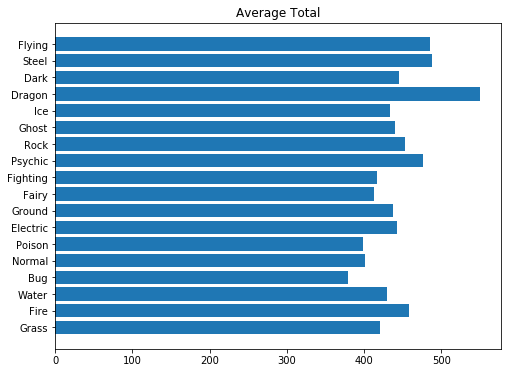

In [93]:
average_total = []
for i in range(len(types)):
    average_total.append(np.mean(pokemon_data[pokemon_data['Type 1'] == types[i]]['Total']))

plt.figure(figsize=(8,6))
y = np.arange(len(types))
plt.barh(y,average_total)
plt.yticks(y, types)
plt.title("Average Total")
plt.show()

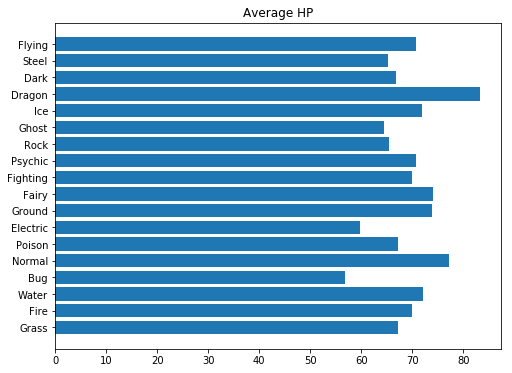

In [94]:
average_hp = []
for i in range(len(types)):
    average_hp.append(np.mean(pokemon_data[pokemon_data['Type 1'] == types[i]]['HP']))

plt.figure(figsize=(8, 6))
y = np.arange(len(types))
plt.barh(y,average_hp)
plt.yticks(y, types)
plt.title("Average HP")
plt.show()

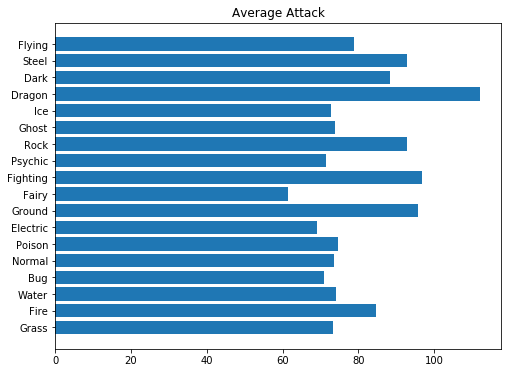

In [95]:
average_attack = []
for i in range(len(types)):
    average_attack.append(np.mean(pokemon_data[pokemon_data['Type 1'] == types[i]]['Attack']))

plt.figure(figsize=(8, 6))
y = np.arange(len(types))
plt.barh(y,average_attack)
plt.yticks(y, types)
plt.title("Average Attack")
plt.show()

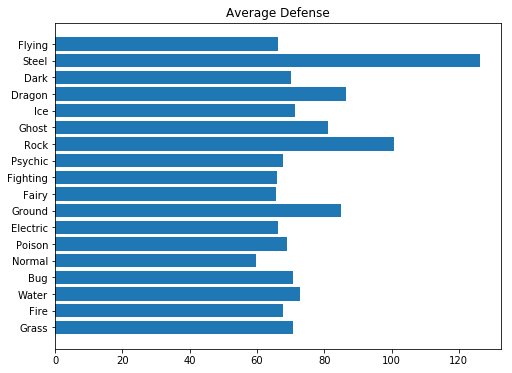

In [96]:
average_defense = []
for i in range(len(types)):
    average_defense.append(np.mean(pokemon_data[pokemon_data['Type 1'] == types[i]]['Defense']))

plt.figure(figsize=(8, 6))
y = np.arange(len(types))
plt.barh(y,average_defense)
plt.yticks(y, types)
plt.title("Average Defense")
plt.show()

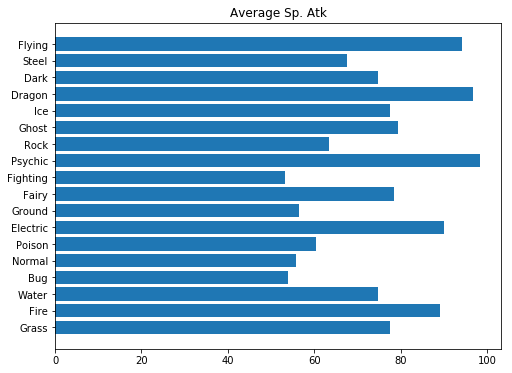

In [97]:
average_sp_atk = []
for i in range(len(types)):
    average_sp_atk.append(np.mean(pokemon_data[pokemon_data['Type 1'] == types[i]]['Sp. Atk']))

plt.figure(figsize=(8, 6))
y = np.arange(len(types))
plt.barh(y,average_sp_atk)
plt.yticks(y, types)
plt.title("Average Sp. Atk")
plt.show()

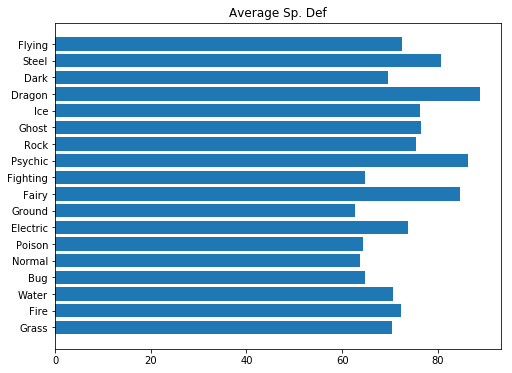

In [98]:
average_sp_def = []
for i in range(len(types)):
    average_sp_def.append(np.mean(pokemon_data[pokemon_data['Type 1'] == types[i]]['Sp. Def']))

plt.figure(figsize=(8, 6))
y = np.arange(len(types))
plt.barh(y,average_sp_def)
plt.yticks(y, types)
plt.title("Average Sp. Def")
plt.show()

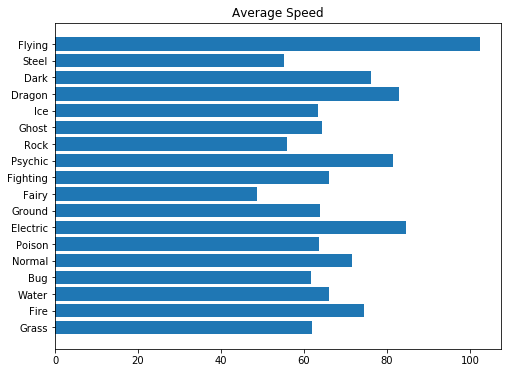

In [99]:
average_speed = []
for i in range(len(types)):
    average_speed.append(np.mean(pokemon_data[pokemon_data['Type 1'] == types[i]]['Speed']))

plt.figure(figsize=(8, 6))
y = np.arange(len(types))
plt.barh(y,average_speed)
plt.yticks(y, types)
plt.title("Average Speed")
plt.show()

So far, we have a roughly view of the data. We know how the attirbutes distribute. We also know the distribution of difference types in __Type 1__. And for each type in __Type 1__, we have see the average attributes. We can do some analyze based on these observations later.